# Problem Statement:-

 This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:




•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
# first we will import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\arunk\OneDrive\Desktop\avocado.csv.zip')

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7612,35,2017-04-30,1.44,309256.66,87512.66,108724.01,6537.73,106482.26,102811.33,3670.93,0.0,conventional,2017,RaleighGreensboro
14175,6,2016-11-13,2.28,28907.25,541.62,18490.50,41.96,9833.17,801.11,9032.06,0.0,organic,2016,Seattle
10938,44,2015-02-22,1.71,1860.35,889.62,56.29,0.00,914.44,518.36,396.08,0.0,organic,2015,Pittsburgh
16647,51,2017-01-08,1.67,56310.43,4527.73,18578.92,5649.58,27554.20,21617.03,5937.17,0.0,organic,2017,Plains
14196,27,2016-06-19,1.75,40879.73,1015.37,38691.88,35.72,1136.76,332.71,804.05,0.0,organic,2016,Seattle
16159,40,2017-03-26,0.77,9755.34,422.08,1987.08,0.00,7346.18,218.01,7128.17,0.0,organic,2017,Nashville
8414,42,2017-03-12,0.94,7040683.56,2392258.48,1230878.83,143967.04,3273579.21,2340076.30,928524.91,4978.0,conventional,2017,West
17637,0,2018-03-25,1.81,3119.20,76.12,1006.43,0.00,2036.65,618.64,1418.01,0.0,organic,2018,Boise
6175,29,2017-06-11,0.98,181254.11,82013.93,22618.84,1338.07,75283.27,71041.43,3179.14,1062.7,conventional,2017,Columbus
10479,1,2015-12-20,1.66,3764.64,479.91,2713.01,0.00,571.72,533.33,38.39,0.0,organic,2015,Nashville


In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# Columns 'Date', 'type' and 'region' have object data types

In [10]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

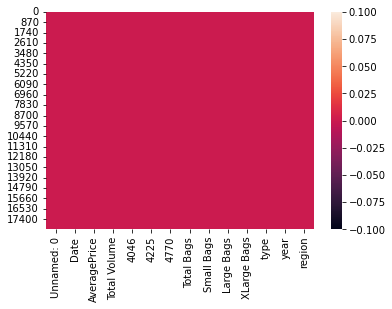

In [11]:
sns.heatmap(df.isna())

In [12]:
# there are no null values present.

In [13]:
df.duplicated().sum()

0

In [14]:
# There are no duplicate values present

In [15]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [17]:
cor=df.corr()

In [18]:
cor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

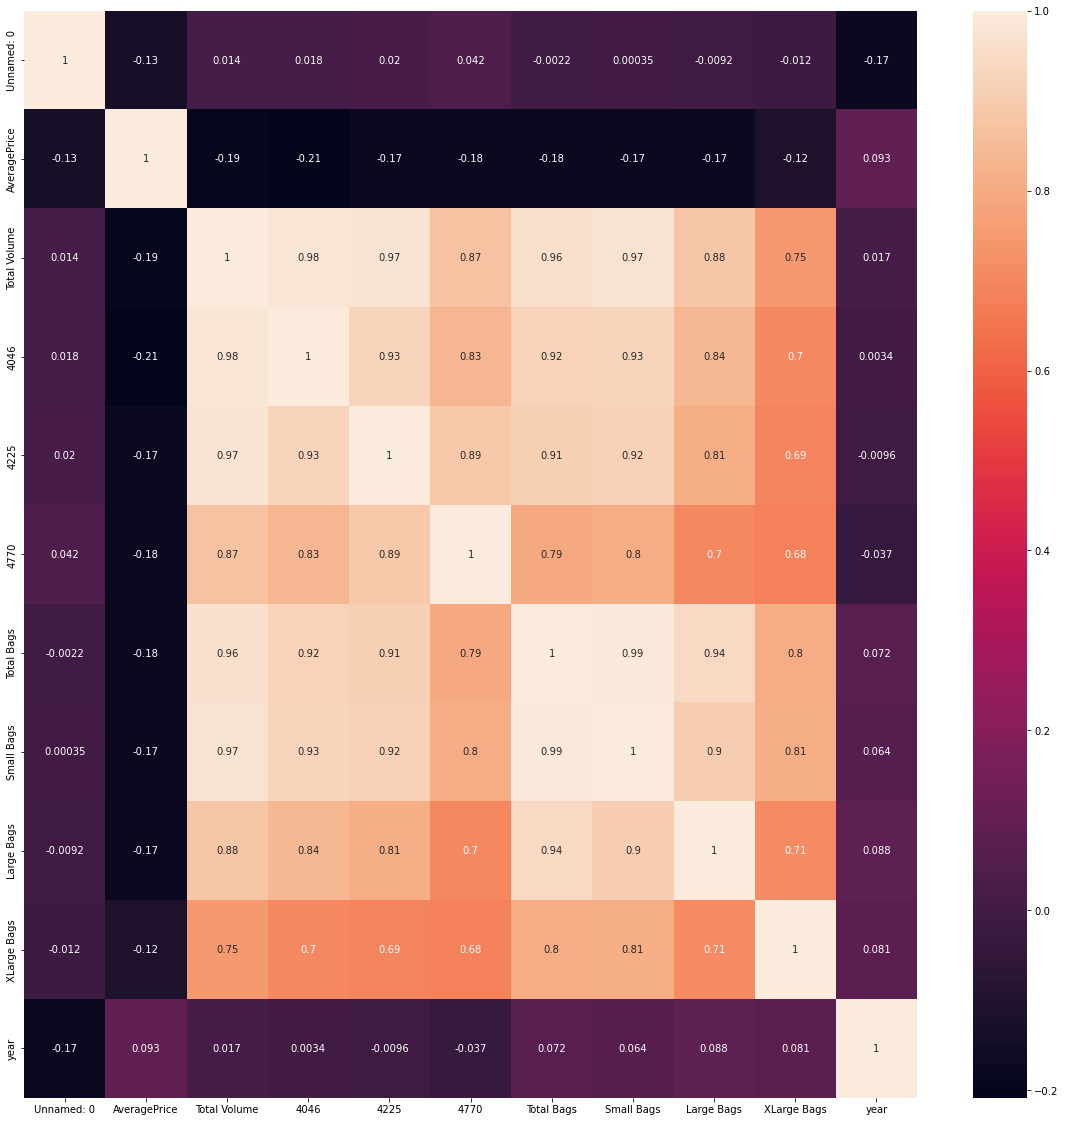

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [20]:
# Looking at the data 1st by taking 'region' as our target variable.

In [21]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [22]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
# removing the unnecessary libraries

In [24]:
df=df.drop(columns=['Unnamed: 0','Date'])

In [25]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
df['type'].nunique()

2

In [28]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [29]:
# we will convert the object data to int.

# In column 'type':-    'conventional'=0  &  'organic'=1

In [30]:
df.replace({'type':{'conventional':0,'organic':1}},inplace=True)

In [31]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.7+ MB


In [33]:
df['region'].nunique()

54

<AxesSubplot:xlabel='region', ylabel='count'>

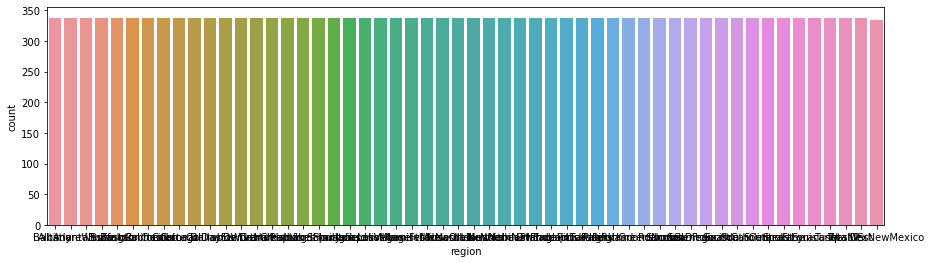

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(df["region"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

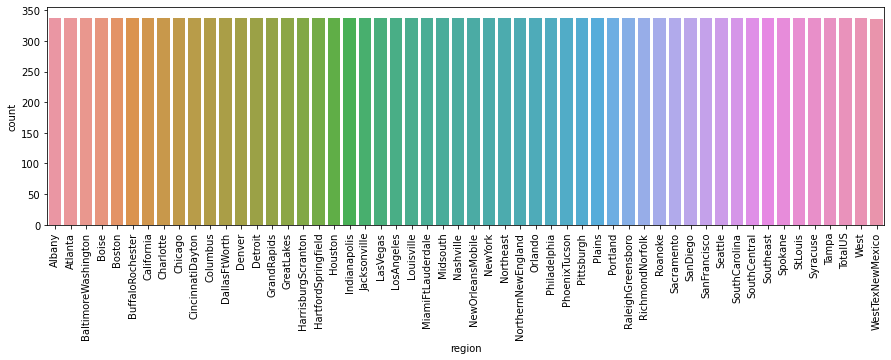

In [35]:
plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.xticks(rotation=90)

In [36]:
# in all the regions, the count  of avocado is almost the same.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1.7+ MB


In [38]:
#let's encode our target variable

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [40]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


In [41]:
# visualising the data

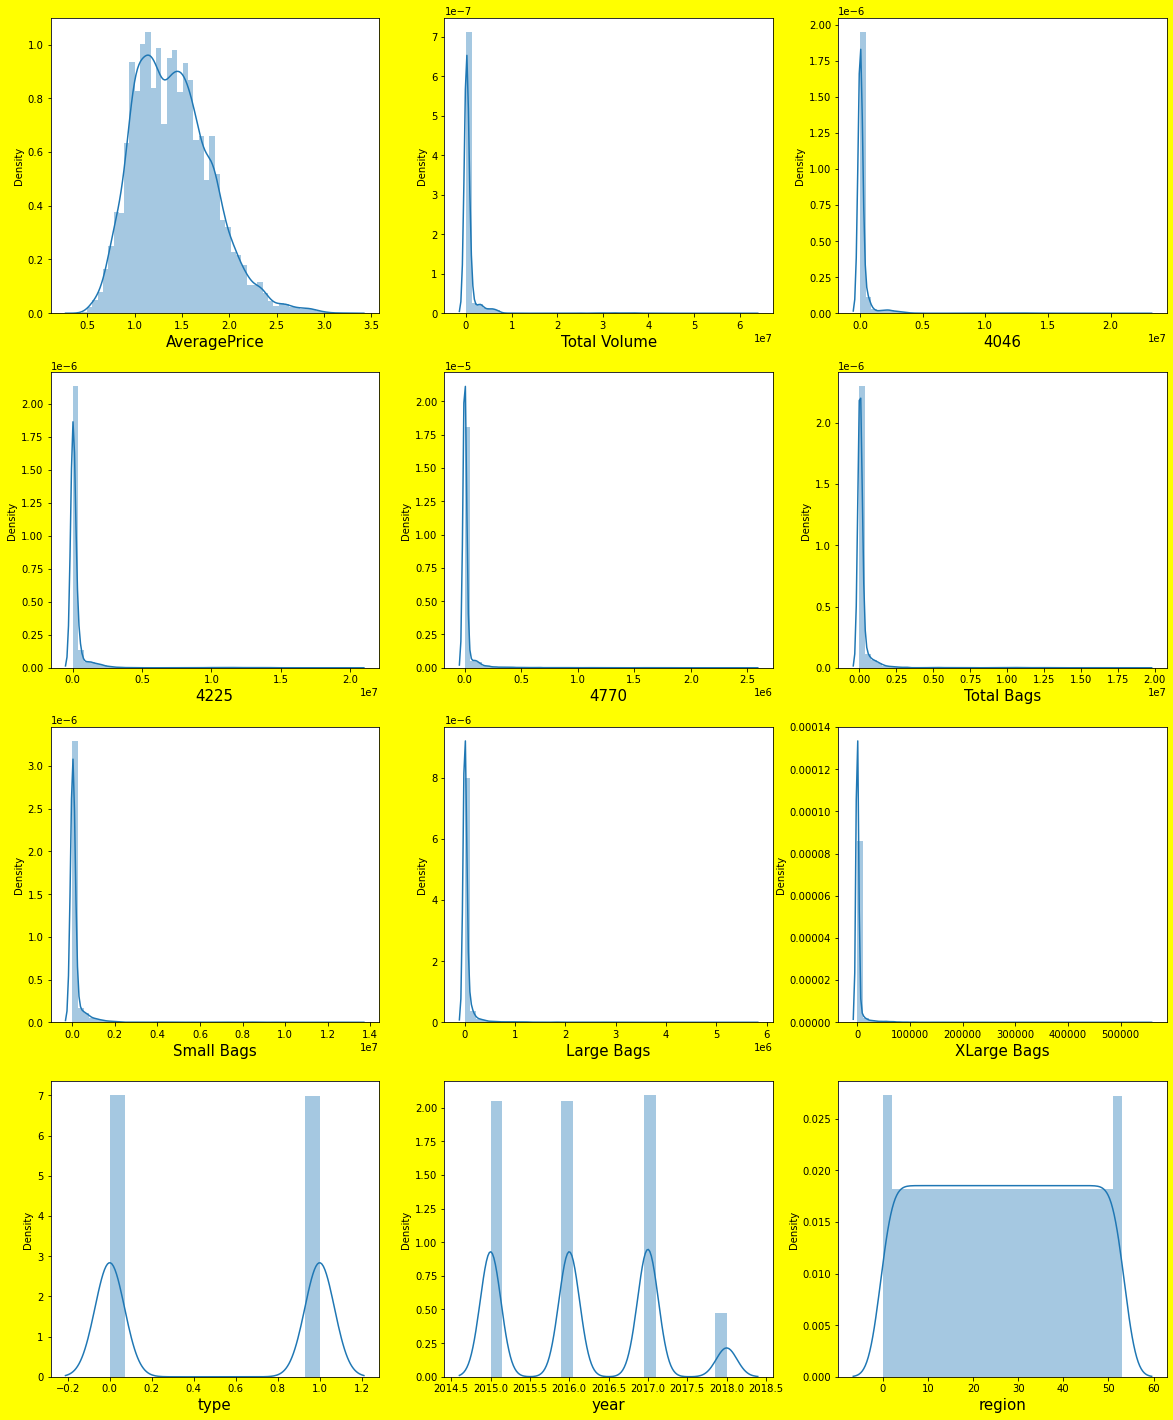

In [42]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in df:
    if pltno<=12:
        ax=plt.subplot(4,3,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

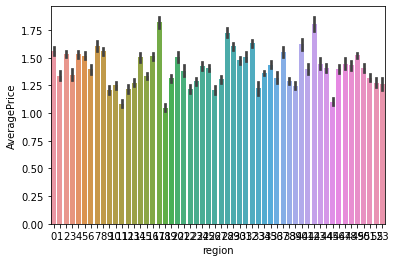

In [43]:
sns.barplot(df['region'],df['AveragePrice'])

In [44]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [45]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

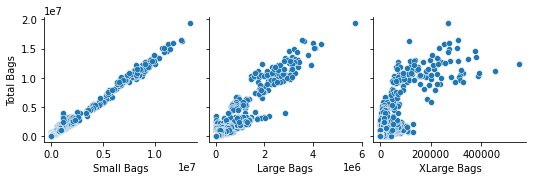

In [46]:
sns.pairplot(df, x_vars=['Small Bags','Large Bags','XLarge Bags'], y_vars=['Total Bags'])


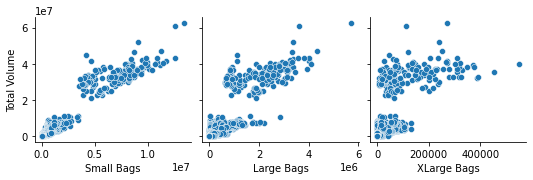

In [47]:
sns.pairplot(df, x_vars=['Small Bags','Large Bags','XLarge Bags'], y_vars=['Total Volume'])


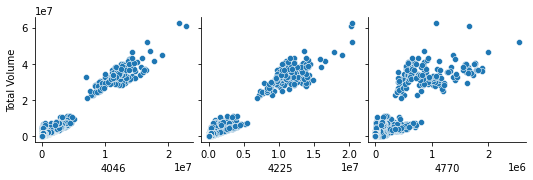

In [48]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars=['Total Volume'])


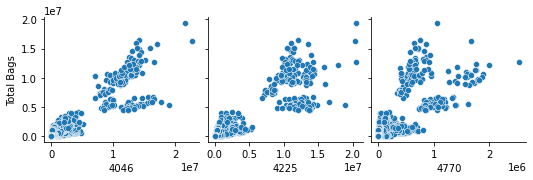

In [49]:
sns.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars=['Total Bags'])


<AxesSubplot:>

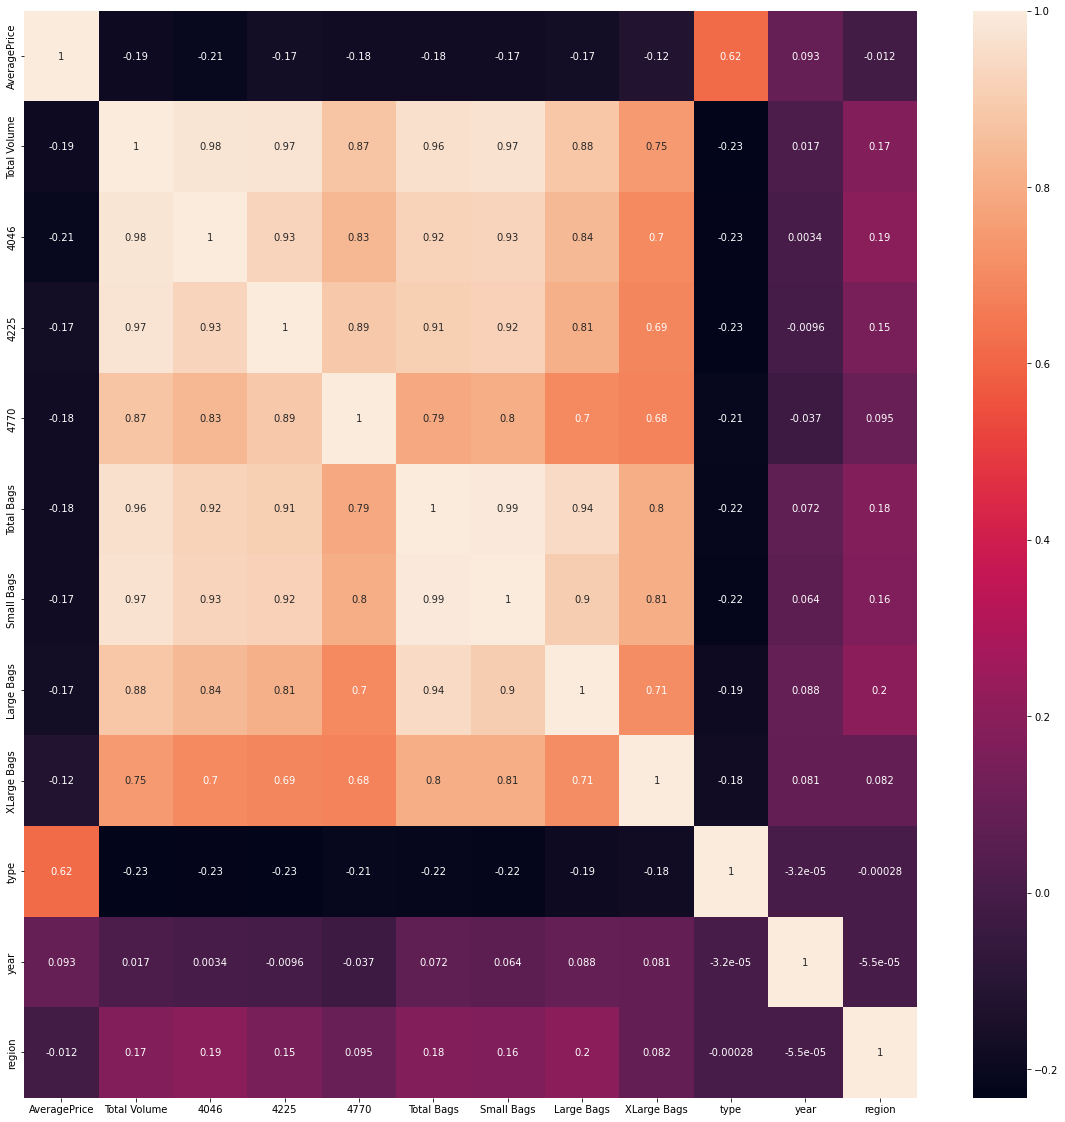

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

In [51]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [52]:
# there is definitely some skewness present in some of the features.

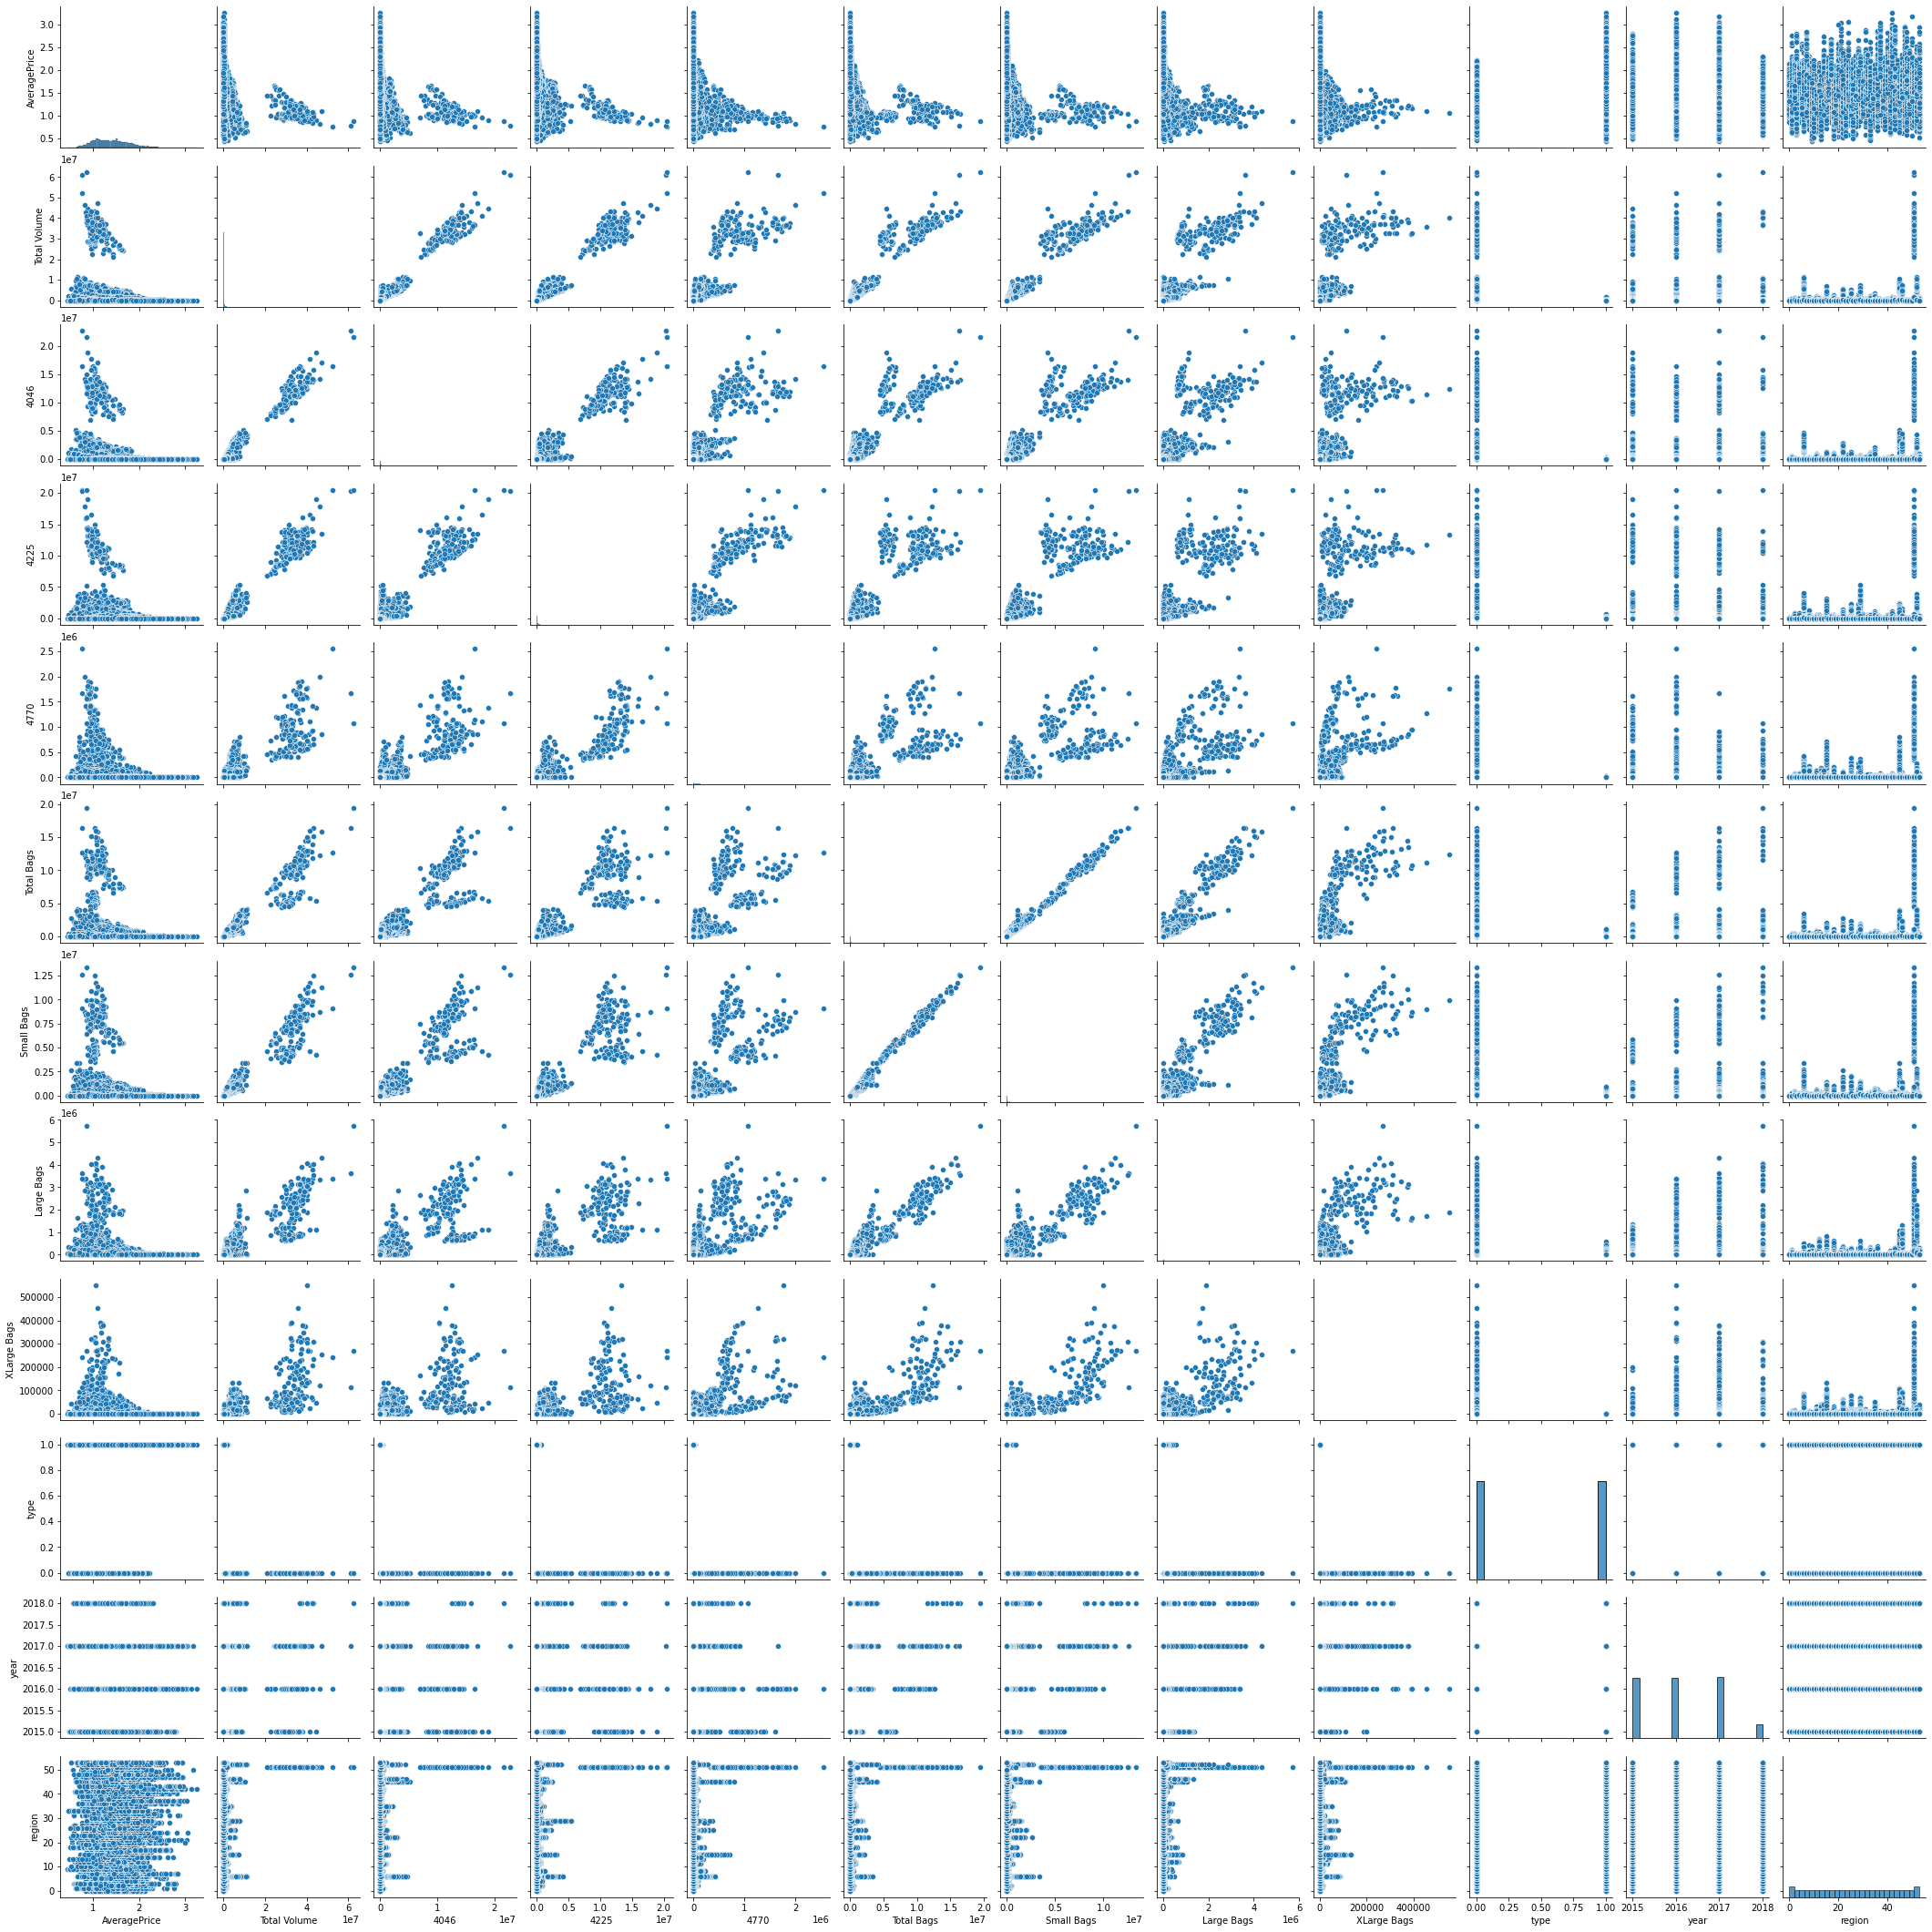

In [53]:
sns.pairplot(df)

In [54]:
# we will remove column 'year' from the dataset first as it is highly negativly correlated with the target variable.

In [55]:
df=df.drop(columns=['year'])

In [56]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


<AxesSubplot:>

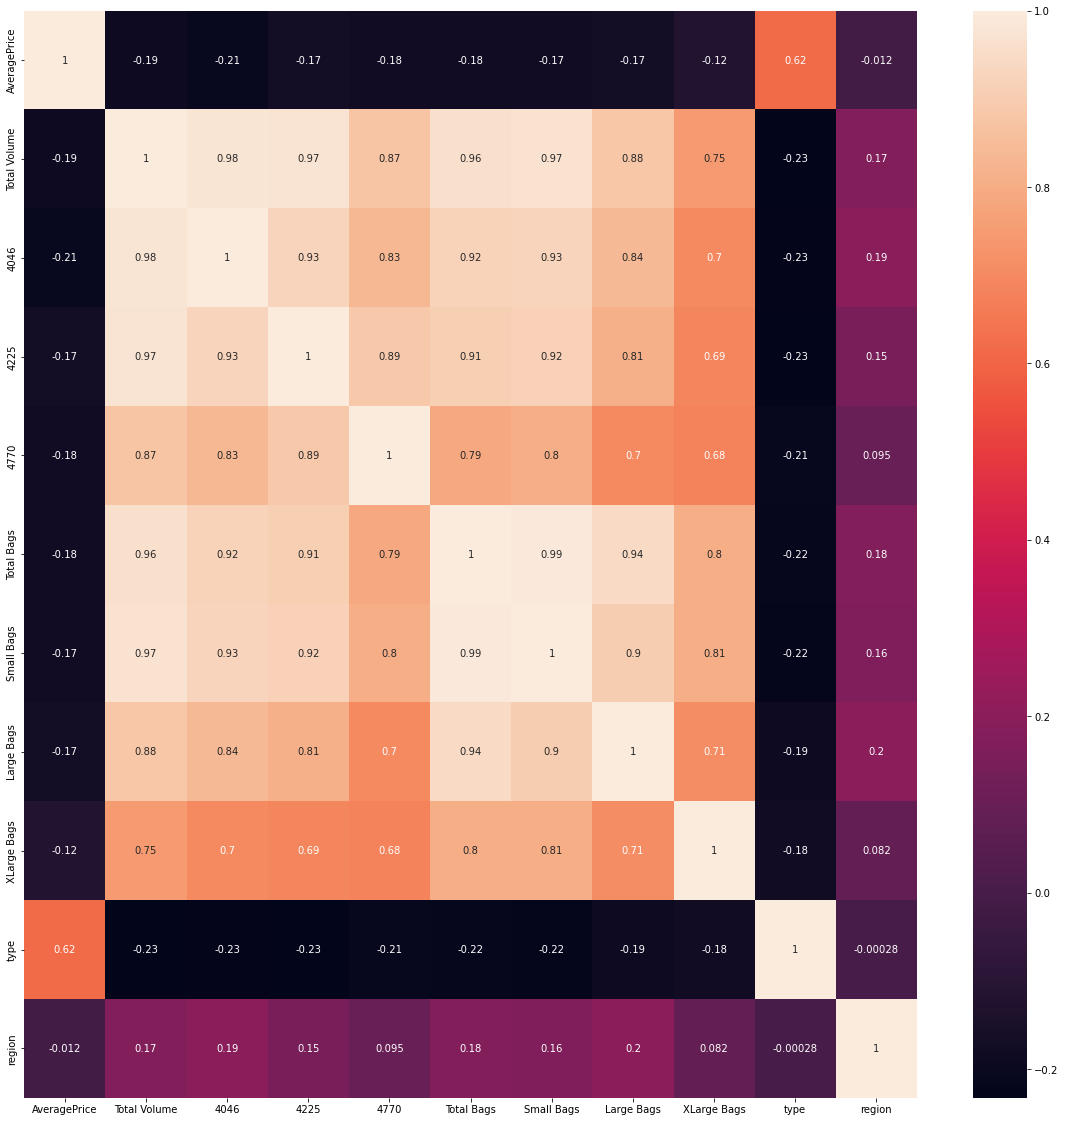

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

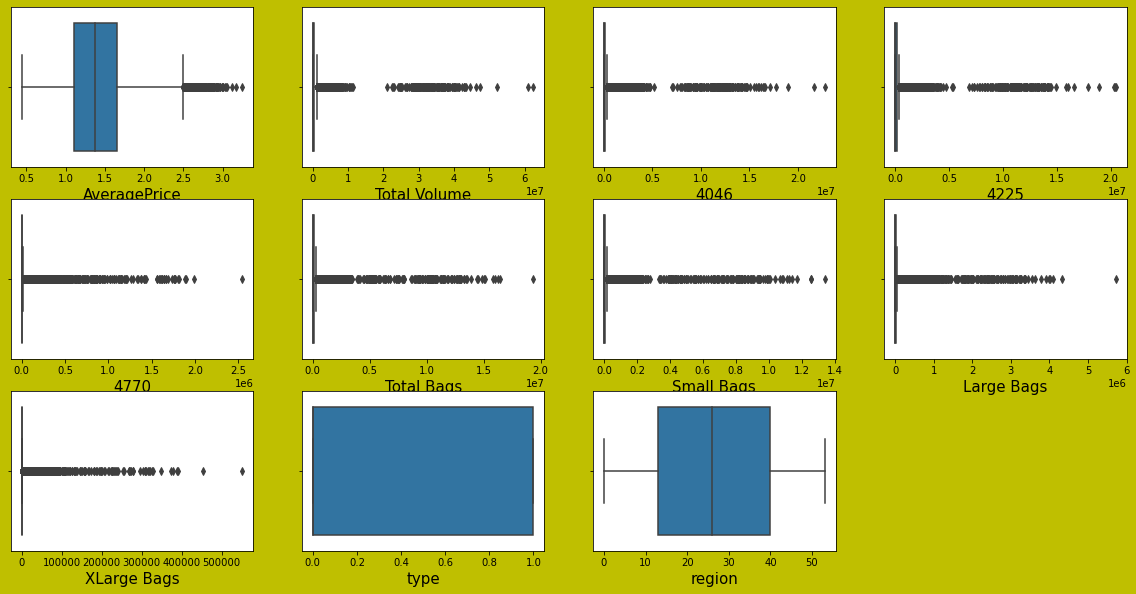

In [58]:
plt.figure(figsize=(20,10),facecolor='y')
pn=1
for c in df:
    if pn<=11:
        ax=plt.subplot(3,4,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

In [59]:
# there is definitely outliers present in the dataset.
# so we will deal with them.

In [60]:
# let's remove the outliers

In [61]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape



(18249, 11)

In [62]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [63]:
 df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


In [64]:
df1.shape

(17651, 11)

In [65]:
df.shape

(18249, 11)

In [66]:
# data loss

(18249-17651)/18249*100

3.276891884486821

In [67]:
# 3.27% of dataa loss is acceptable.

In [68]:
# now let's seperate the features and label.

In [69]:
x=df1.drop(columns=['region'])
y=df1['region']

In [70]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [71]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [72]:
x.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

In [73]:
# let's deal with the skewness

In [74]:
x['Total Volume']=np.log1p(df['Total Volume'])
x['4046']=np.log1p(df['4046'])
x['4225']=np.log1p(df['4225'])
x['4770']=np.log1p(df['4770'])
x['Total Bags']=np.log1p(df['Total Bags'])
x['Small Bags']=np.log1p(df['Small Bags'])
x['Large Bags']=np.log1p(df['Large Bags'])
x['XLarge Bags']=np.log1p(df['XLarge Bags'])

In [75]:
x.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
dtype: float64

In [76]:
dfn= pd.concat([x, y], axis=1, join='inner') 

In [77]:
dfn

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,53


# This is for future use

In [78]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1


In [79]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [80]:
x.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
dtype: float64

In [81]:
# now we will standardise the data

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.19535234, -0.06196232, -0.58731803, ..., -0.64825387,
        -0.6273191 , -1.01904715],
       [-0.1435096 , -0.13430157, -0.71946434, ..., -0.6365202 ,
        -0.6273191 , -1.01904715],
       [-1.2322071 ,  0.21823548, -0.66899685, ..., -0.62164622,
        -0.6273191 , -1.01904715],
       ...,
       [ 1.20440158, -0.76950251, -0.54445811, ..., -0.85559137,
        -0.6273191 ,  0.98130886],
       [ 1.35992979, -0.69459605, -0.46819541, ..., -0.81200971,
        -0.6273191 ,  0.98130886],
       [ 0.55636736, -0.65956156, -0.27170762, ..., -0.98149671,
        -0.6273191 ,  0.98130886]])

In [83]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [84]:
xx

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.195352,-0.061962,-0.587318,0.431565,-0.246207,-0.473426,-0.215789,-0.648254,-0.627319,-1.019047
1,-0.143510,-0.134302,-0.719464,0.359601,-0.199437,-0.431908,-0.179590,-0.636520,-0.627319,-1.019047
2,-1.232207,0.218235,-0.668997,0.683316,-0.001478,-0.504018,-0.243116,-0.621646,-0.627319,-1.019047
3,-0.843387,0.033021,-0.560308,0.532565,-0.145897,-0.661685,-0.384129,-0.552915,-0.627319,-1.019047
4,-0.324959,-0.167601,-0.616931,0.353051,-0.135308,-0.632653,-0.362677,-0.449388,-0.627319,-1.019047
...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.670586,-0.378245,-0.861693,-1.215018,-0.268139,-0.046548,-0.241763,-0.627319,0.981309
17647,0.789660,-0.765474,-0.544515,-0.569192,-1.215018,-0.443885,-0.200255,-0.317520,-0.627319,0.981309
17648,1.204402,-0.769503,-0.544458,-0.690718,0.424488,-0.437415,-0.182019,-0.855591,-0.627319,0.981309
17649,1.359930,-0.694596,-0.468195,-0.620126,0.424171,-0.365019,-0.119253,-0.812010,-0.627319,0.981309


In [85]:
# now we will check the vif values

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [87]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [88]:
vif

,Vif values,features
0,1.967781,AveragePrice
1,39.709542,Total Volume
2,5.493555,4046
3,8.584578,4225
4,3.719377,4770
5,21.281922,Total Bags
6,9.621052,Small Bags
7,2.648316,Large Bags
8,1.812324,XLarge Bags
9,3.930038,type


In [89]:
# the vif values of  the  columns except 'Total Volume' and 'Total Bags' is less than 10.
# so, we will remove the columns 'Total Volume' and 'Total Bags' 

In [90]:
x=x.drop(columns=['Total Volume','Total Bags'])

In [91]:
x

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,1.33,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0
1,1.35,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0
2,0.93,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0
3,1.08,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0
4,1.28,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0
...,...,...,...,...,...,...,...,...
18244,1.63,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1
18245,1.71,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1
18246,1.87,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1
18247,1.93,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1


In [92]:
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.19535234, -0.58731803,  0.43156498, ..., -0.64825387,
        -0.6273191 , -1.01904715],
       [-0.1435096 , -0.71946434,  0.35960138, ..., -0.6365202 ,
        -0.6273191 , -1.01904715],
       [-1.2322071 , -0.66899685,  0.68331601, ..., -0.62164622,
        -0.6273191 , -1.01904715],
       ...,
       [ 1.20440158, -0.54445811, -0.69071773, ..., -0.85559137,
        -0.6273191 ,  0.98130886],
       [ 1.35992979, -0.46819541, -0.62012644, ..., -0.81200971,
        -0.6273191 ,  0.98130886],
       [ 0.55636736, -0.27170762, -0.70526836, ..., -0.98149671,
        -0.6273191 ,  0.98130886]])

In [93]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [94]:
xx

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,-0.195352,-0.587318,0.431565,-0.246207,-0.215789,-0.648254,-0.627319,-1.019047
1,-0.143510,-0.719464,0.359601,-0.199437,-0.179590,-0.636520,-0.627319,-1.019047
2,-1.232207,-0.668997,0.683316,-0.001478,-0.243116,-0.621646,-0.627319,-1.019047
3,-0.843387,-0.560308,0.532565,-0.145897,-0.384129,-0.552915,-0.627319,-1.019047
4,-0.324959,-0.616931,0.353051,-0.135308,-0.362677,-0.449388,-0.627319,-1.019047
...,...,...,...,...,...,...,...,...
17646,0.582289,-0.378245,-0.861693,-1.215018,-0.046548,-0.241763,-0.627319,0.981309
17647,0.789660,-0.544515,-0.569192,-1.215018,-0.200255,-0.317520,-0.627319,0.981309
17648,1.204402,-0.544458,-0.690718,0.424488,-0.182019,-0.855591,-0.627319,0.981309
17649,1.359930,-0.468195,-0.620126,0.424171,-0.119253,-0.812010,-0.627319,0.981309


In [95]:
# now we will build the models.

In [96]:
#importing necessary libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(20,40):
    x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.46952186721051437 on random state 20


In [98]:
# thee model gives best accuracy at random state 20

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,random_state=20,test_size=.25)


# Logistic regression

In [100]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lpred=lr.predict(xtest)
print(accuracy_score(ytest,lpred))
print(confusion_matrix(ytest,lpred))
print(classification_report(ytest,lpred))

0.46952186721051437
[[44  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 46 ...  0  0  5]
 ...
 [ 0  0  0 ... 41  2  0]
 [ 0  0  0 ...  0 51  0]
 [ 0  1  1 ...  0  0 17]]
              precision    recall  f1-score   support

           0       0.49      0.59      0.54        74
           1       0.27      0.51      0.35        81
           2       0.59      0.51      0.54        91
           3       0.39      0.25      0.30        89
           4       0.42      0.60      0.49        87
           5       0.62      0.43      0.50        94
           6       0.75      0.82      0.78        71
           7       0.47      0.53      0.50        81
           8       0.67      0.73      0.70        93
           9       0.43      0.70      0.53        74
          10       0.79      0.26      0.40       102
          11       0.50      0.64      0.56        91
          12       0.34      0.45      0.39        73
          13       0.28      0.28      0.28        89
          14 

In [101]:
# 46.95% accuracy

# RandomForest Classifier

In [102]:
rc=RandomForestClassifier()
rc.fit(xtrain,ytrain)
cpred=rc.predict(xtest)
print(accuracy_score(ytest,cpred))
print(confusion_matrix(ytest,cpred))
print(classification_report(ytest,cpred))

0.888737820077045
[[69  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  1]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  0  2 ...  0  0 65]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        74
           1       0.84      0.84      0.84        81
           2       0.95      0.96      0.95        91
           3       0.93      0.84      0.88        89
           4       0.92      0.97      0.94        87
           5       0.89      0.74      0.81        94
           6       1.00      0.96      0.98        71
           7       0.87      0.93      0.90        81
           8       0.97      0.97      0.97        93
           9       0.78      0.88      0.83        74
          10       0.92      0.84      0.88       102
          11       0.96      0.98      0.97        91
          12       0.93      0.95      0.94        73
          13       0.87      0.74      0.80        89
          14   

In [103]:
# 88.87% accuracy

# SVC

In [104]:
svc=SVC()
svc.fit(xtrain,ytrain)
spred=svc.predict(xtest)
print(accuracy_score(ytest,spred))
print(confusion_matrix(ytest,spred))
print(classification_report(ytest,spred))

0.7706775436211194
[[70  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  0  3 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.65      0.95      0.77        74
           1       0.51      0.60      0.55        81
           2       0.95      0.87      0.91        91
           3       0.89      0.73      0.80        89
           4       0.79      0.89      0.83        87
           5       0.83      0.51      0.63        94
           6       0.99      0.96      0.97        71
           7       0.75      0.78      0.76        81
           8       0.94      0.96      0.95        93
           9       0.67      0.84      0.74        74
          10       0.75      0.66      0.70       102
          11       0.80      0.95      0.86        91
          12       0.87      0.90      0.89        73
          13       0.61      0.62      0.61        89
          14  

In [105]:
# 77.06% accuracy

# DecisionTree Classsifier

In [106]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
dpred=dt.predict(xtest)
print(accuracy_score(ytest,dpred))
print(confusion_matrix(ytest,dpred))
print(classification_report(ytest,dpred))

0.7786086562429186
[[53  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  4]
 [ 0  0 80 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  0  2 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        74
           1       0.72      0.60      0.66        81
           2       0.89      0.88      0.88        91
           3       0.81      0.74      0.78        89
           4       0.84      0.87      0.86        87
           5       0.73      0.64      0.68        94
           6       0.99      0.94      0.96        71
           7       0.79      0.80      0.80        81
           8       0.86      0.91      0.89        93
           9       0.63      0.70      0.66        74
          10       0.90      0.75      0.82       102
          11       0.83      0.88      0.86        91
          12       0.85      0.79      0.82        73
          13       0.76      0.71      0.73        89
          14  

In [107]:
# 77.86% accuracy

# KNeighbors Classifier

In [108]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(accuracy_score(ytest,kpred))
print(confusion_matrix(ytest,kpred))
print(classification_report(ytest,kpred))

0.8282347609336053
[[65  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  0  2 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        74
           1       0.66      0.70      0.68        81
           2       0.90      0.91      0.91        91
           3       0.86      0.78      0.82        89
           4       0.80      0.91      0.85        87
           5       0.78      0.66      0.72        94
           6       0.96      0.97      0.97        71
           7       0.79      0.88      0.83        81
           8       0.93      0.97      0.95        93
           9       0.73      0.80      0.76        74
          10       0.83      0.74      0.78       102
          11       0.88      0.93      0.90        91
          12       0.88      0.93      0.91        73
          13       0.79      0.74      0.76        89
          14  

In [109]:
# 82.82% accuracy

# CrossValidation Score

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
#for logistic regression

ls=cross_val_score(lr,scaled_x,y)
print(ls)
print(ls.mean())

[0.31407533 0.28923513 0.38243626 0.43371105 0.28866856]
0.3416252648536676


In [112]:
# for random forest classifier

rs=cross_val_score(rc,scaled_x,y)
print(rs)
print(rs.mean())

[0.66666667 0.80084986 0.75892351 0.68271955 0.48838527]
0.679508970727101


In [113]:
# for svc

ss=cross_val_score(svc,scaled_x,y)
print(ss)
print(ss.mean())

[0.63013311 0.6509915  0.65665722 0.61586402 0.44560907]
0.5998509839599564


In [114]:
# for decisiontree classifier

ds=cross_val_score(dt,scaled_x,y)
print(ds)
print(ds.mean())

[0.49844237 0.67563739 0.64192635 0.55524079 0.42181303]
0.5586119862681247


In [115]:
# for kneighbors classifier

ks=cross_val_score(k,scaled_x,y)
print(ks)
print(ks.mean())


[0.59586519 0.60991501 0.65325779 0.57988669 0.42577904]
0.5729407441816432


In [116]:
# as per the observation, RandomForest classifier is our best model
# so hyperparameter tuning will be done on that model

# HyperParameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}

In [119]:
fmodel=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=20)

In [120]:
fmodel.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [121]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

88.76048039882166


In [122]:
#  the randomforest classifier gives the accuracy of 88.76%

In [123]:
# now we will save the model

In [124]:
import joblib
joblib.dump(fmodel,'avocado_classification_model')

['avocado_classification_model']

In [125]:
#load the model

In [126]:
m = joblib.load("avocado_classification_model")
print(m.predict(xtest))

[10 34 41 ... 12 26 41]


In [127]:
d=pd.DataFrame({'predicted values':pred,'actual values':ytest})

In [128]:
d

,predicted values,actual values
11621,10,47
13714,34,34
11309,41,41
8578,8,8
3964,22,22
...,...,...
2730,52,52
14066,43,41
6292,12,12
7000,26,26


# Now Let's build the regression model for prediction of average price

In [129]:
dfn

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,53


In [130]:
# drop column 'Total Bags' and 'Total Volume ' as these columns had a very high vif value

In [131]:
dfn=dfn.drop(columns=['Total Volume','Total Bags'])

In [132]:
# seperate the features and label

In [133]:
x=dfn.drop(columns=['AveragePrice'])
y=dfn['AveragePrice']

In [134]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,0
1,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,0
2,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,0
3,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,0
4,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,0
...,...,...,...,...,...,...,...,...
18244,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,53
18245,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,53
18246,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,53
18247,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,53


In [135]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [136]:
# import the necessary libraries

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [142]:
# standardize the data

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-5.87318026e-01,  4.31564984e-01, -2.46206752e-01, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       [-7.19464339e-01,  3.59601380e-01, -1.99437445e-01, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       [-6.68996850e-01,  6.83316005e-01, -1.47777180e-03, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       ...,
       [-5.44458113e-01, -6.90717727e-01,  4.24488037e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00],
       [-4.68195412e-01, -6.20126442e-01,  4.24170502e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00],
       [-2.71707625e-01, -7.05268356e-01,  1.32697029e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00]])

In [145]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.4682361526205999 on Random State: 6


In [146]:
# best random state is 6

In [147]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.25,random_state=6)

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [149]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.4682361526205999
Mean absolute error:  0.2228189164210907
Mean squared error:  0.08088128952279162


In [150]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

0.8232081917149696
Mean absolute error:  0.1152656469521867
Mean squared error:  0.026890036811692716


In [151]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

0.6367546324119289
Mean absolute error:  0.15713573532744163
Mean squared error:  0.05524962610469068


In [152]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.48161167559150486
Mean absolute error:  0.22628373883935438
Mean squared error:  0.07884687226923084


In [153]:
k=KNeighborsRegressor()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(r2_score(ytest, kpred))
print("Mean absolute error: ", mean_absolute_error(ytest,kpred))
print("Mean squared error: ", mean_squared_error(ytest,kpred))

0.7935497524909344
Mean absolute error:  0.1254901427600272
Mean squared error:  0.031401085882619535


In [154]:
s=SVR()
s.fit(xtrain,ytrain)
spred=s.predict(xtest)
print(r2_score(ytest, spred))
print("Mean absolute error: ", mean_absolute_error(ytest,spred))
print("Mean squared error: ", mean_squared_error(ytest,spred))

0.6668821154539202
Mean absolute error:  0.16657317089006757
Mean squared error:  0.050667235461699614


# CrossValidation Score

In [155]:
# Linear Regression

s=cross_val_score(lr,scaled_x,y)
print(s)
print(s.mean())

[-0.74445865 -0.12233488  0.46007362  0.04304549  0.0654053 ]
-0.05965382291226338


In [156]:
# RandomForest Regressor

s=cross_val_score(r,scaled_x,y)
print(s)
print(s.mean())

[-0.4386908   0.30934848  0.58664102  0.23756545  0.03802544]
0.14657791739084514


In [157]:
# DecisionTree Regressor

s=cross_val_score(dt,scaled_x,y)
print(s)
print(s.mean())

[-1.70213047  0.00727404  0.21937052 -0.52363773 -0.34964481]
-0.4697536922571642


In [158]:
# Adaboost Regressor

s=cross_val_score(a,scaled_x,y)
print(s)
print(s.mean())

[-0.86228148  0.00855364  0.49500331 -0.03649428  0.09475257]
-0.060093248688316024


In [159]:
# Kneighbor Regressor

s=cross_val_score(k,scaled_x,y)
print(s)
print(s.mean())

[-1.07518893  0.25533015  0.38284017  0.17450823 -0.09136869]
-0.0707758115238966


In [160]:
# as per the observation, randomforest Regressor is our best model

# HyperParameter tuning

In [161]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[4,5,6,7,8],
      'criterion':['mse','mae']}

gcs=GridSearchCV(r,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto'}

In [161]:
fmodel2=RandomForestRegressor(max_features='auto',criterion='mse',max_depth=4)

In [162]:
fmodel2.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', max_depth=4)

In [163]:
pred2=fmodel2.predict(xtest)
acc=r2_score(ytest,pred2)
print(acc*100)

54.9026803229489


In [164]:
# the Randomforest Regressor gives the accuracy of 54.90%

In [165]:
#now we will save the model

In [166]:
import joblib
joblib.dump(fmodel,'avocado_regressor_model')

['avocado_regressor_model']

In [167]:
#load the model

In [168]:
m = joblib.load("avocado_regressor_model")
print(m.predict(xtest))

[15  6 28 ... 29 34 38]


# The prediction percentage is not up to the mark so let's try to make it more efficient

# -------------------------------------------------------------------------------------------------------------

In [169]:
dfn

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,0
1,1.35,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,0
2,0.93,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,0
3,1.08,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,0
4,1.28,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,53
18245,1.71,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,53
18246,1.87,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,53
18247,1.93,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,53


In [170]:
xx=dfn.drop(columns=['AveragePrice'])

In [171]:
yy=dfn['AveragePrice']

In [172]:
xx

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0,0
1,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0,0
2,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0,0
3,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0,0
4,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0,0
...,...,...,...,...,...,...,...,...
18244,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1,53
18245,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1,53
18246,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1,53
18247,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1,53


In [173]:
yy

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [174]:
# standardise the features

In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(xx)
scaledx

array([[-5.87318026e-01,  4.31564984e-01, -2.46206752e-01, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       [-7.19464339e-01,  3.59601380e-01, -1.99437445e-01, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       [-6.68996850e-01,  6.83316005e-01, -1.47777180e-03, ...,
        -6.27319102e-01, -1.01904715e+00, -1.69549505e+00],
       ...,
       [-5.44458113e-01, -6.90717727e-01,  4.24488037e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00],
       [-4.68195412e-01, -6.20126442e-01,  4.24170502e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00],
       [-2.71707625e-01, -7.05268356e-01,  1.32697029e-01, ...,
        -6.27319102e-01,  9.81308862e-01,  1.74705401e+00]])

In [176]:
from sklearn.feature_selection import SelectKBest, f_classif


In [177]:
bf = SelectKBest(score_func = f_classif, k = 'all')
fit = bf.fit(xx,yy)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xx.columns)


dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

       Feature      Score
6         type  58.944331
0         4046  39.322054
2         4770  32.850256
3   Small Bags  26.579593
4   Large Bags  25.552796
1         4225  24.047934
5  XLarge Bags  14.849855
7       region   1.167461


In [178]:
# we will remove colum 'region' as from the above observation.

In [179]:
dfn.drop(columns=['region'],inplace=True)

In [180]:
dfn

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,1.33,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0
1,1.35,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0
2,0.93,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0
3,1.08,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0
4,1.28,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0
...,...,...,...,...,...,...,...,...
18244,1.63,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1
18245,1.71,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1
18246,1.87,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1
18247,1.93,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1


In [181]:
xx=dfn.drop(columns=['AveragePrice'])
yy=dfn['AveragePrice']

In [182]:
xx

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,6.944801,10.905146,3.895080,9.060055,4.545951,0.0,0
1,6.515127,10.706381,4.083115,9.149429,4.589955,0.0,0
2,6.679222,11.600485,4.879007,8.992584,4.645736,0.0,0
3,7.032624,11.184108,4.298373,8.644425,4.903495,0.0,0
4,6.848515,10.688288,4.340944,8.697389,5.291746,0.0,0
...,...,...,...,...,...,...,...
18244,7.624599,7.333154,0.000000,9.477908,6.070391,0.0,1
18245,7.083975,8.141044,0.000000,9.098407,5.786284,0.0,1
18246,7.084159,7.805389,6.591591,9.143431,3.768384,0.0,1
18247,7.332127,8.000363,6.590315,9.298401,3.931826,0.0,1


In [183]:
yy

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [184]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scalex = sc.fit_transform(xx)
scalex

array([[-0.58731803,  0.43156498, -0.24620675, ..., -0.64825387,
        -0.6273191 , -1.01904715],
       [-0.71946434,  0.35960138, -0.19943744, ..., -0.6365202 ,
        -0.6273191 , -1.01904715],
       [-0.66899685,  0.68331601, -0.00147777, ..., -0.62164622,
        -0.6273191 , -1.01904715],
       ...,
       [-0.54445811, -0.69071773,  0.42448804, ..., -0.85559137,
        -0.6273191 ,  0.98130886],
       [-0.46819541, -0.62012644,  0.4241705 , ..., -0.81200971,
        -0.6273191 ,  0.98130886],
       [-0.27170762, -0.70526836,  0.13269703, ..., -0.98149671,
        -0.6273191 ,  0.98130886]])

In [185]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(scalex,yy,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.4674412665964819 on Random State: 6


In [186]:
# best random state is 6

In [187]:
xtrain,xtest,ytrain,ytest=train_test_split(scalex,yy,test_size=0.25,random_state=6)

In [188]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.4674412665964819
Mean absolute error:  0.2227926145583726
Mean squared error:  0.08100219169952129


In [189]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

0.7750445411833993
Mean absolute error:  0.12960790845230002
Mean squared error:  0.034215728812599135


In [190]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

0.5484404696359502
Mean absolute error:  0.1735191479719012
Mean squared error:  0.0686822116474054


In [191]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.48304516523214813
Mean absolute error:  0.22588194278661747
Mean squared error:  0.07862883847241639


In [192]:
k=KNeighborsRegressor()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(r2_score(ytest, kpred))
print("Mean absolute error: ", mean_absolute_error(ytest,kpred))
print("Mean squared error: ", mean_squared_error(ytest,kpred))

0.749476947825505
Mean absolute error:  0.13730432812145932
Mean squared error:  0.03810456016315431


In [193]:
s=SVR()
s.fit(xtrain,ytrain)
spred=s.predict(xtest)
print(r2_score(ytest, spred))
print("Mean absolute error: ", mean_absolute_error(ytest,spred))
print("Mean squared error: ", mean_squared_error(ytest,spred))

0.6428931190704972
Mean absolute error:  0.17285867750907272
Mean squared error:  0.05431596218769027


# CrossValidation Score

In [194]:
# Linear Regression

s=cross_val_score(lr,scalex,yy)
print(s)
print(s.mean())

[-0.77269873 -0.06470407  0.45791184  0.04326039  0.06103632]
-0.055038847877437624


In [195]:
# RandomForest Regressor

s=cross_val_score(r,scalex,yy)
print(s)
print(s.mean())

[-0.3491805   0.3041832   0.55481829  0.24813311 -0.05156149]
0.14127852332898466


In [196]:
# DecisionTree Regressor

s=cross_val_score(dt,scaled_x,y)
print(s)
print(s.mean())

[-1.74277122 -0.00428125  0.19526534 -0.48006276 -0.32792839]
-0.4719556596161782


In [197]:
# Adaboost Regressor

s=cross_val_score(a,scaled_x,y)
print(s)
print(s.mean())

[-0.78609317  0.04009216  0.489427   -0.0342461   0.10057259]
-0.03804950368502062


In [198]:
# Kneighbor Regressor

s=cross_val_score(k,scaled_x,y)
print(s)
print(s.mean())

[-1.07518893  0.25533015  0.38284017  0.17450823 -0.09136869]
-0.0707758115238966


In [202]:
# as per the observation, randomforest Regressor is our best model

# HyperParameter Tuning

In [202]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[10,20,30,40],
      'criterion':['mse','mae']}

gcs=GridSearchCV(r,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto'}

In [203]:
fmodel3=RandomForestRegressor(max_features='auto',criterion='mse',max_depth=10) 

In [204]:
fmodel3.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', max_depth=10)

In [205]:
pred3=fmodel3.predict(xtest)
acc=r2_score(ytest,pred3)
print(acc*100)

72.39914731341817


In [206]:
# now the model gives the accuracy of 72.39%

In [207]:
#now we will save the model

In [208]:
import joblib
joblib.dump(fmodel3,'f_avocado_regressor_model')

['f_avocado_regressor_model']

In [209]:
#load the model

In [210]:
f = joblib.load("f_avocado_regressor_model")
print(f.predict(xtest))

[0.91646846 1.1188493  1.09110031 ... 1.20478469 1.42594357 1.3937945 ]


In [211]:
#predicted values
print('predicted values:-',pred3)
print('actual values:-',ytest)

predicted values:- [0.91646846 1.1188493  1.09110031 ... 1.20478469 1.42594357 1.3937945 ]
actual values:- 3983     0.76
1788     0.96
2152     1.03
6765     0.84
13872    1.77
         ... 
16765    1.62
16225    1.83
5427     1.14
5898     1.56
1714     1.38
Name: AveragePrice, Length: 4413, dtype: float64


In [212]:
dn=pd.DataFrame({'predicted values':pred3,'actual values':ytest})

In [213]:
dn

,predicted values,actual values
3983,0.916468,0.76
1788,1.118849,0.96
2152,1.091100,1.03
6765,1.023219,0.84
13872,1.724040,1.77
...,...,...
16765,1.668976,1.62
16225,2.030576,1.83
5427,1.204785,1.14
5898,1.425944,1.56
